In [9]:
from relaxation_super_res import RelaxationSuperRes
import cv2
from upscaling_funcs import *
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

In [10]:
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
img_small = cv2.resize(img, (0, 0), fx=0.125, fy=0.125, interpolation=cv2.INTER_AREA)
img_relaxation, base_pixels = relaxation_upscale(img_small,8)

In [11]:
kernel = np.ones((3,3))
kernel = kernel / np.sum(kernel)
model_ones_3x3 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_ones_3x3 = model_ones_3x3.predict(epsilon=0.1)

relaxation iter: 0
1978.1694972883315
relaxation iter: 1
0.0


In [12]:
kernel = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]])
kernel = kernel / np.sum(kernel)

model_regular_3x3 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_regular_3x3 = model_regular_3x3.predict(epsilon=0.1)

relaxation iter: 0
1978.1694972883315
relaxation iter: 1
0.0


In [13]:
kernel = np.ones((5,5))
kernel = kernel / np.sum(kernel)
model_ones_5x5 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_ones_5x5 = model_ones_5x5.predict(epsilon=0.1)

relaxation iter: 0


In [ ]:
kernel = np.array([[0, 0, 1, 0, 0],
                       [0, 1, 1, 1, 0],
                       [1, 1, 1, 1, 1],
                       [0, 1, 1, 1, 0],
                       [0, 0, 1, 0, 0]])
kernel = kernel / np.sum(kernel)

model_regular_5x5 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_regular_5x5 = model_regular_5x5.predict(epsilon=0.1)

relaxation iter: 0
872.3181687436268
relaxation iter: 1
0.0


In [ ]:
img_bicubic = cv2.resize(img_small, (0, 0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
img_nn = cv2.resize(img_small, (0, 0), fx=8, fy=8, interpolation=cv2.INTER_NEAREST)
img_bilinear = cv2.resize(img_small, (0, 0), fx=8, fy=8, interpolation=cv2.INTER_LINEAR)
img_lanczos = cv2.resize(img_small, (0, 0), fx=8, fy=8, interpolation=cv2.INTER_LANCZOS4)
img_area = cv2.resize(img_small, (0, 0), fx=8, fy=8, interpolation=cv2.INTER_AREA)

In [ ]:
def mse(imageA, imageB):
    return mean_squared_error(imageA, imageB)

def mae(imageA, imageB):
    return np.mean(np.abs(imageA - imageB))

def ssim(imageA, imageB):
    return structural_similarity(imageA, imageB, data_range=imageB.max() - imageB.min())

def psnr(imageA, imageB):
    return peak_signal_noise_ratio(imageA, imageB, data_range=imageB.max() - imageB.min())

In [ ]:
metrics = {}
images = [img_relaxation_ones_3x3, img_relaxation_ones_5x5, img_relaxation_regular_3x3, img_relaxation_regular_5x5, img_bicubic, img_nn, img_bilinear, img_lanczos, img_area]
methods = ['Relaxation Ones 3x3', 'Relaxation Ones 5x5', 'Relaxation Regular 3x3', 'Relaxation Regular 5x5', 'Bicubic', 'Nearest', 'Bilinear', 'Lanczos', 'Area']

for method, image in zip(methods, images):
    metrics[method] = {
        'MSE': mse(img, image),
        'MAE': mae(img, image),
        'SSIM': ssim(img, image),
        'PSNR': psnr(img, image)
    }

# Print metrics for review
for method, scores in metrics.items():
    print(f"{method} Metrics:")
    for score_name, score_value in scores.items():
        print(f"  {score_name}: {score_value:.4f}")
    print("\n")

Relaxation Ones 3x3 Metrics:
  MSE: 440.5717
  MAE: 199.2259
  SSIM: 0.4692
  PSNR: 18.2704


Relaxation Ones 5x5 Metrics:
  MSE: 440.5717
  MAE: 199.2259
  SSIM: 0.4692
  PSNR: 18.2704


Relaxation Regular 3x3 Metrics:
  MSE: 440.5717
  MAE: 199.2259
  SSIM: 0.4692
  PSNR: 18.2704


Relaxation Regular 5x5 Metrics:
  MSE: 440.5717
  MAE: 199.2259
  SSIM: 0.4692
  PSNR: 18.2704


Bicubic Metrics:
  MSE: 172.8256
  MAE: 122.0245
  SSIM: 0.5759
  PSNR: 23.1990


Nearest Metrics:
  MSE: 235.2737
  MAE: 123.5691
  SSIM: 0.4858
  PSNR: 20.9948


Bilinear Metrics:
  MSE: 197.1541
  MAE: 121.8902
  SSIM: 0.5334
  PSNR: 21.7119


Lanczos Metrics:
  MSE: 170.3688
  MAE: 122.2473
  SSIM: 0.5779
  PSNR: 23.3068


Area Metrics:
  MSE: 235.2737
  MAE: 123.5691
  SSIM: 0.4858
  PSNR: 20.9948




C:\Users\Alex\AppData\Local\Temp\ipykernel_24616\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_24616\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_24616\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_24616\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)


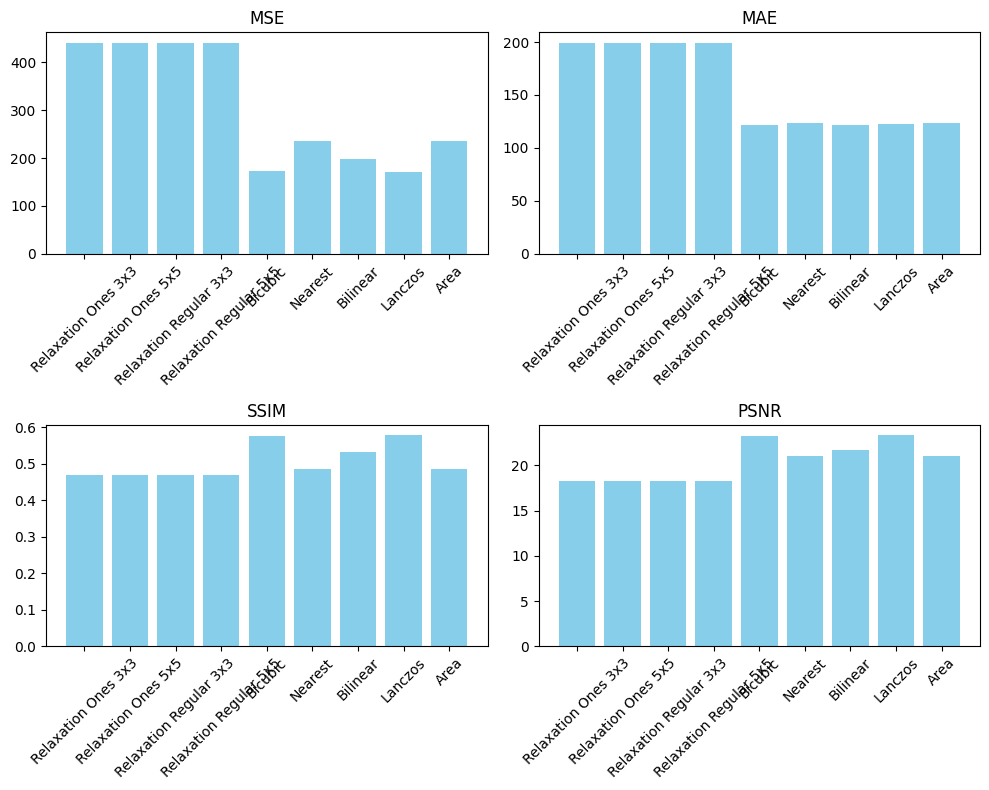

In [ ]:
import matplotlib.pyplot as plt

# Setup plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.ravel()
metrics_names = ['MSE', 'MAE', 'SSIM', 'PSNR']

# Plot each metric
for i, metric in enumerate(metrics_names):
    values = [metrics[method][metric] for method in methods]
    axes[i].bar(methods, values, color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_xticklabels(methods, rotation=45)

plt.tight_layout()
plt.show()